### Section Notes

In this section, we will be tuning Decision Tree Model

### Setting up

In [1]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 6.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import optuna
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
### Helper method
# You may consider changeing the colour scheme in practice

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Loading Data

We will not do the train-test split again and again

#### Loading Data

In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/train_normalised.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/test_normalised.csv')

In [7]:
df_train.shape

(81957, 24)

In [8]:
X_train = df_train.drop("is_canceled", axis = 1)
y_train = df_train["is_canceled"]

X_test = df_test.drop("is_canceled", axis = 1)
y_test = df_test["is_canceled"]

### Bayesian Tuner

**没事别乱跑，一跑一小时**

In [13]:
def objective(trial):
  params_grid = {
      "min_samples_leaf" : trial.suggest_int("min_samples_leaf", 1, 60),
      "min_samples_split": trial.suggest_int("min_samples_split", 2, 60),
      "max_depth": trial.suggest_int("max_depth", 3, 100),
      "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"])
  }
  model = DecisionTreeClassifier(random_state = 42, **params_grid)
  score = cross_val_score(model, X_train, y_train, cv = 5).mean()
  return score

In [26]:
study = optuna.create_study(direction = "maximize")

#Add the default as baseline
study.enqueue_trial(
    {"criterion":"gini",
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "max_depth": 30}
)

study.optimize(objective, n_trials = 100)

trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}= {}, ".format(key, value))

[I 2023-03-29 06:00:35,181] A new study created in memory with name: no-name-5d9f46da-5890-4d1a-b695-09cb0643e7ed
[I 2023-03-29 06:00:41,488] Trial 0 finished with value: 0.8197225089808269 and parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'max_depth': 30, 'criterion': 'gini'}. Best is trial 0 with value: 0.8197225089808269.
[I 2023-03-29 06:00:44,190] Trial 1 finished with value: 0.8261893207056129 and parameters: {'min_samples_leaf': 35, 'min_samples_split': 42, 'max_depth': 53, 'criterion': 'entropy'}. Best is trial 1 with value: 0.8261893207056129.
[I 2023-03-29 06:00:47,288] Trial 2 finished with value: 0.8263967099277391 and parameters: {'min_samples_leaf': 48, 'min_samples_split': 54, 'max_depth': 33, 'criterion': 'gini'}. Best is trial 2 with value: 0.8263967099277391.
[I 2023-03-29 06:00:50,305] Trial 3 finished with value: 0.8275680837181685 and parameters: {'min_samples_leaf': 34, 'min_samples_split': 57, 'max_depth': 32, 'criterion': 'gini'}. Best is trial 3 w

Best Score:  0.8291908644827318
Best Params: 
  min_samples_leaf= 25, 
  min_samples_split= 28, 
  max_depth= 22, 
  criterion= gini, 


### Testing Tuned DT

Please add the best candidate in this section.

How come DT is performing so good again???

--------DT Tuned--------
Correctly classified instances: 29049
Accuracy Score is 0.82702
Recall Score is 0.69968
Precision Score is 0.81607
F1 Score is 0.75341
       0     1
0  19767  2092
1   3984  9282
[[19767  2092]
 [ 3984  9282]]


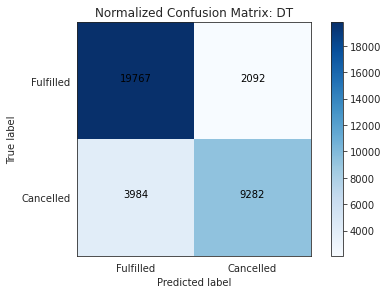

In [29]:
print("--------DT Tuned--------")

model = DecisionTreeClassifier(
    random_state = 42,
    min_samples_leaf= 25, 
    min_samples_split= 28, 
    max_depth= 22, 
    criterion= "gini")
model.fit(X_train, y_train)


y_predict = model.predict(X_test)
print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Fulfilled','Cancelled']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Normalized Confusion Matrix: DT')

### Tuning Analysis

#### Analysis on Hypermeter Importance

In [27]:
optuna.visualization.plot_param_importances(study)

#### Analysis on a single feature

In the R package, the only parameter we tune is the tree depth, the equivalence of sklearn's 'max_depth' parameter. It would be interesting to see how different max_depth would affect the CV error.

Kindly note that this plot cannot be used to choose our max_depth parameter, as we have other factors to further augment our DT model.

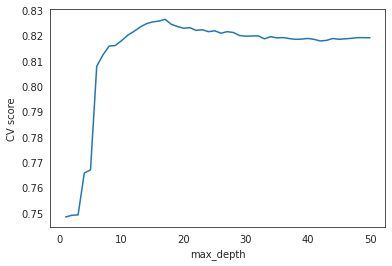

In [17]:
# Define range of max_depth values to test
max_depth_range = range(1, 50)

# Compute CV scores for each max_depth value
cv_scores = []
for depth in max_depth_range:
    model_DT = DecisionTreeClassifier(max_depth=depth, random_state = 42)
    scores = cross_val_score(model_DT, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the CV scores against max_depth
plt.plot(max_depth_range, cv_scores)
plt.xlabel('max_depth')
plt.ylabel('CV score')
plt.show()